# Imported Libraries

In [1]:
#We imported some known libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
#Imported the Data as DataFrame
wine_data=pd.read_csv("Wine Quality.csv",sep=',',header=[0])

In [3]:
#Displayed the first rows
#The dataset describes the amount of various chemicals present in wine and their effect on it's quality.
#We want to predict the quality using all chemical properties.
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine_data.shape
print(wine_data.shape)
print(f'Dataset has {len(wine_data.columns)} columns and {len(wine_data.index)} rows with data.')

(1143, 13)
Dataset has 13 columns and 1143 rows with data.


# Information about the DataFrame

In [5]:
#The target columns have values which are in relation with each other.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#So in order to make predictions , we turn quality into a float.
wine_data['quality'] = wine_data['quality'].astype('float64')
wine_data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [7]:
#Remove the Id because of irrelevance.
wine_data.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

# Description


In [8]:
#Provides a statistical summary of our DataFrame
#count:The number of non-null observations for each column.
# This helps in understanding the underlying characteristics of the data.
wine_data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine_data.shape

(1143, 12)

# Finding Null Values

In [10]:
wine_data.isnull().sum()
#finding and handling null values is essential for maintaining the quality and usability of data, 
#ensuring accurate analysis, and building reliable models.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#list all the distinct values in quality.
print("The Value Quality ",wine_data["quality"].unique())

The Value Quality  [5. 6. 7. 4. 8. 3.]


In [12]:
#Check the relations with other columns.
#This table helps identify patterns or trends between the chemical properties of the wine and its quality rating.
rel= wine_data.groupby("quality").mean().round(2)
rel

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.0,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69
4.0,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26
5.0,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.0,3.30,0.61,9.90
6.0,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.0,3.32,0.68,10.66
7.0,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.0,3.29,0.74,11.48
8.0,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.0,3.24,0.77,11.94


# Plot the impact on Quality

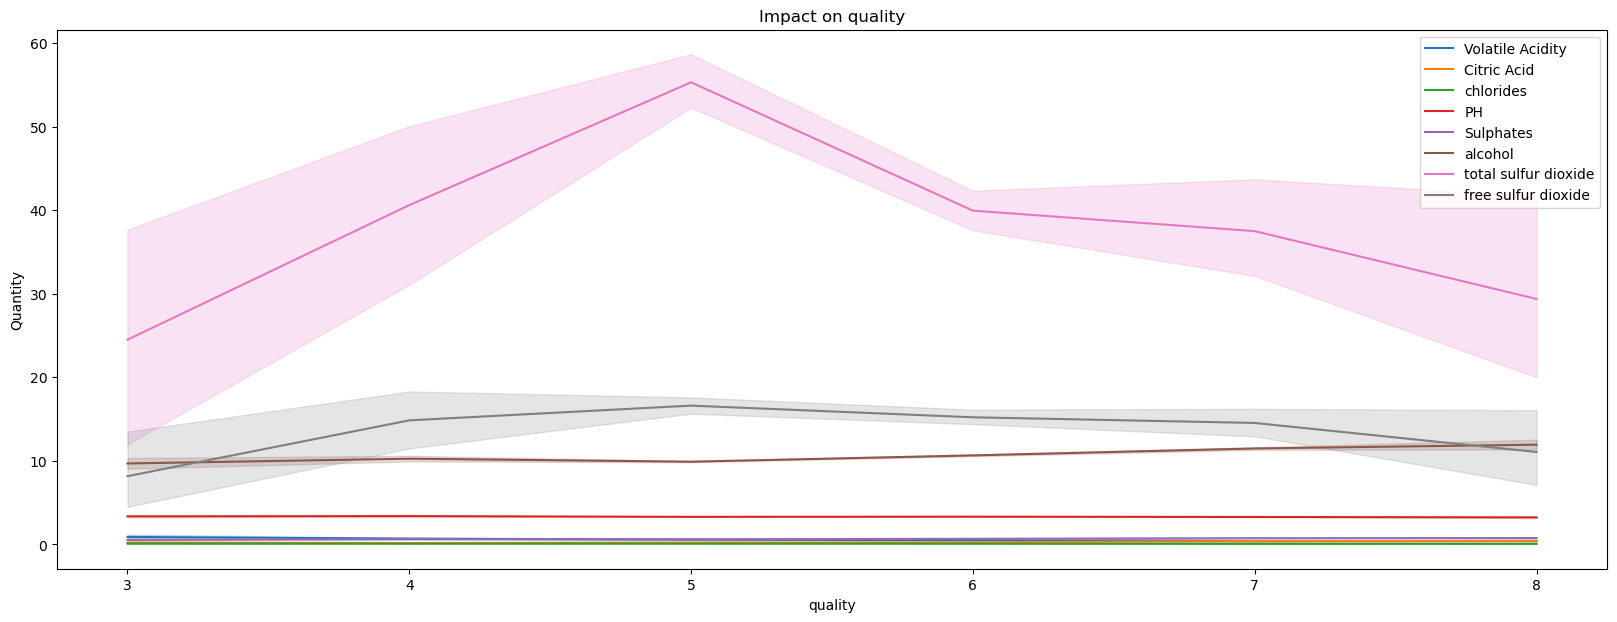

In [13]:
plt.figure(figsize=(20,7))
sns.lineplot(data=wine_data, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=wine_data, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=wine_data, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=wine_data, x="quality",y="pH",label="PH")
sns.lineplot(data=wine_data, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=wine_data, x="quality",y="alcohol", label="alcohol")
sns.lineplot(data=wine_data, x="quality",y="total sulfur dioxide", label="total sulfur dioxide")
sns.lineplot(data=wine_data, x="quality",y="free sulfur dioxide", label="free sulfur dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()
#Elements with high effect on the quality of wine: Alcohol ,Free sulfur dioxide, Total sulfur dioxide
#Wines with quality rating 5 have higher values of free sulfur and total sulfur dioxide compared to other quality ratings.
#Properties like citric acid and alcohol show an increasing trend with increasing wine quality.
#pH, chlorides, and sulphates remain relatively constant across different quality ratings.

#This plot helps in understanding how each chemical property changes as the wine quality changes.


# Histogram

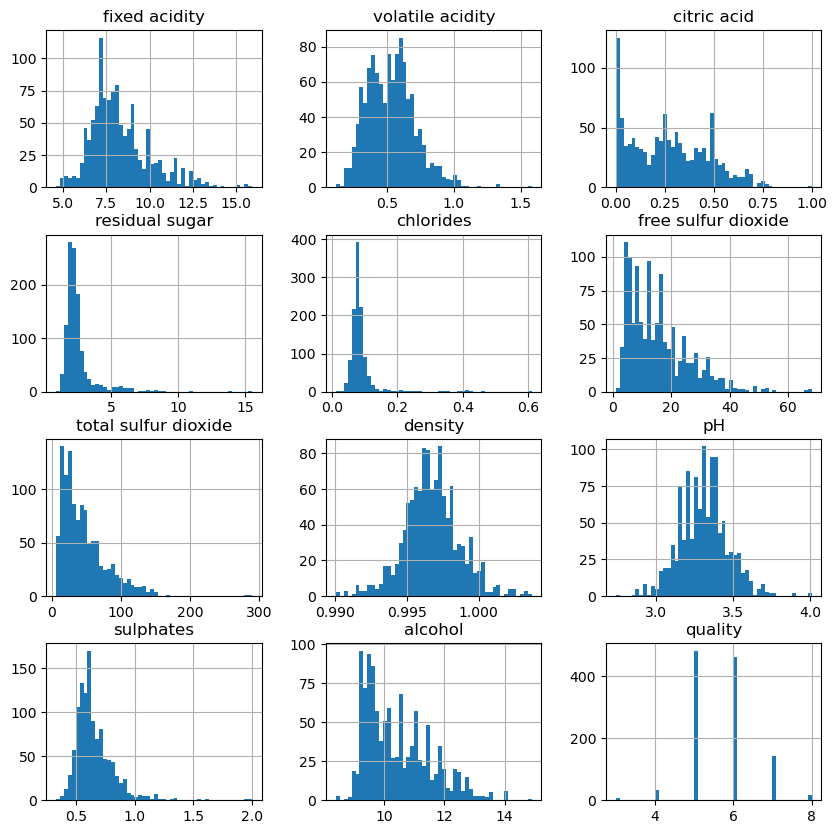

In [14]:
#The histogram provides a visual representation of the distribution of each feature in the wine dataset.
wine_data.hist(bins=50,figsize=(10,10))
plt.show()
#Features are at different scales.
#Most features in the wine dataset are right-skewed, indicating that lower values are more common for these features.
#The quality feature has a roughly normal distribution centered around 5 and 6, 
#indicating that most wines in the dataset are of average quality.
#Features like density and pH show less variability, indicating that these properties are more consistent across different wines.
#Outliers are present in features like residual sugar, free sulfur dioxide, and total sulfur dioxide,
#suggesting that a few wines have unusually high values for these properties.

Text(0, 0.5, 'Count')

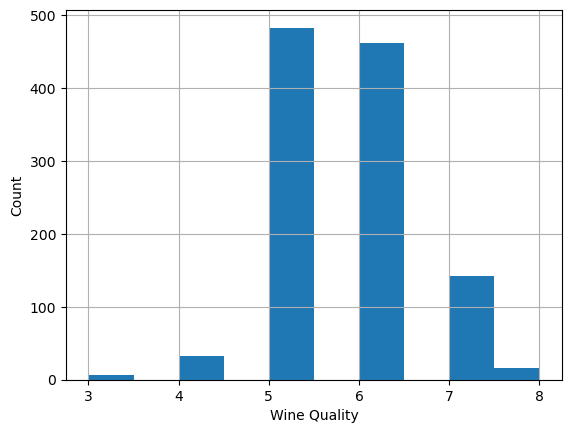

In [15]:
wine_data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')
#Many examples of class 5 and 6 compared to the other classes.

In [16]:
wine_data['quality'].value_counts()
#You can see that there are lots of samples of average wines than good or the poor quality ones.
#x>=5,5

quality
5.0    483
6.0    462
7.0    143
4.0     33
8.0     16
3.0      6
Name: count, dtype: int64

# Define X and y

In [17]:
X = wine_data.drop(columns=['quality'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [18]:
y= wine_data['quality']
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1138    6.0
1139    6.0
1140    5.0
1141    6.0
1142    5.0
Name: quality, Length: 1143, dtype: float64

# Building a Machine Learning Model

 Importing all the necessary libraries for building model

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

# Split the Data, Train and Test

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (914, 11)
X Test  :  (229, 11)
Y Train :  (914,)
Y Test  :  (229,)


 # Linear Model

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
print("Score the X-train with Y-train is : ", lr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", lr.score(X_test,y_test))
#The model has moderate predictive power, explaining around 38% of the variance in the training set 
#and around 32% in the testing set.
#The difference between the training and testing scores is not very large,
#suggesting that the model's performance is relatively consistent between the two datasets.

Score the X-train with Y-train is :  0.3821938480651569
Score the X-test  with Y-test  is :  0.3170693672733127


In [25]:
y_pred=lr.predict(X_test)

In [26]:
print("r2_score:", r2_score(y_test,y_pred))
# means that about 31.7% of the variance in the test data is explained by the model. 

r2_score: 0.3170693672733127


In [27]:
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
#is the average of the absolute differences between predicted values and actual values.
# which means that on average, the predictions are off by about 0.478 units from the actual values. 

mean_absolute_error: 0.4773398352588597


In [28]:
print("mean_squared_error:", mean_squared_error(y_test,y_pred))
# means the average squared difference between the predicted and actual values is 0.38
#This metric helps identify the overall accuracy of the model.

mean_squared_error: 0.38003245026277527


# Improvements

In [29]:
#imported a Ridge Regression
#analyze multiple regression data that suffer from multicollinearity (high corr)
from sklearn.linear_model import Ridge

In [30]:
# Initialize the Ridge Regression model
ridge_reg=Ridge(alpha=0.1, max_iter= 100, tol=0.1)         #alpha= regularization strength
# Fit the model to the training data                       #fit the training data
ridge_reg.fit(X_train,y_train)
# Made predictions on the test data
y_pred_ridge = ridge_reg.predict(X_test)

In [31]:
print("r2_score:",r2_score(y_test,y_pred_ridge))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred_ridge))
print("mean_squared_error:", mean_squared_error(y_test,y_pred_ridge))

r2_score: 0.32142412761382144
mean_absolute_error: 0.4752478519099427
mean_squared_error: 0.37760914376105476


In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]
cv_scores = []

# Perform cross-validation for each alpha
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, max_iter=100, tol=0.1)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Find the alpha with the best score
best_alpha = alpha_values[np.argmax(cv_scores)]
print(best_alpha)

0.1


# Random Forest Regression

In [33]:
#Split the data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=1)

In [34]:
#imported the Random Forest
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(n_estimators=100, random_state=1)   
#100 trees helps to ensure that the model is robust and less likely to overfit.

In [36]:
# We have to fit our data 
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [37]:
#We make now predictions:
y_pred=rfr.predict(X_test)


In [38]:
# the first 2 must be as close to 0 as possible and the last one as close to 1 as possible 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [39]:
print("mean_squared_error:",mean_squared_error(y_test,y_pred))

mean_squared_error: 0.31020131004366813


In [40]:
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

mean_absolute_error: 0.4173362445414847


In [41]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.505554197568389


# IMPROVEMENT

In [42]:
#set up a grid search for hyperparameter tuning
param_grid= {
    'n_estimators':[100,200],
    'max_depth':[None,10],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}

rfr = RandomForestRegressor(n_estimators=100)

In [43]:
#Hyperparameter tuning that selects the best combinations based on cross-validated performance.
from sklearn.model_selection import GridSearchCV

In [44]:
#Grid Search with Cross-Validation (CV) to find the best hyperparameters for a RandomForestRegressor
rfr_cv=GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, scoring= "neg_mean_squared_error")
rfr_cv.fit(X_train,y_train)
y_pred_tun=rfr_cv.predict(X_test)
#This process helps to optimize the model's performance by systematically exploring a range of hyperparameter values
#and selecting the combination that yields the best results.

In [45]:
print("r2_score:",r2_score(y_test,y_pred_tun))

r2_score: 0.5046578321074595


In [46]:
print("mean_squared_error:",mean_squared_error(y_test,y_pred_tun))

mean_squared_error: 0.3107636643783411


In [47]:
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred_tun))

mean_absolute_error: 0.4247625372565329


# Gradient Boosting Regression

In [48]:
#Imported Libraries 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [50]:
# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [51]:
# Make predictions
y_predgbr = gbr.predict(X_test)


In [52]:
# Evaluate the model
print("mean_squared_error:",mean_squared_error(y_test, y_predgbr))


mean_squared_error: 0.3525209413310978


In [53]:
print("mean_absolute_error:",mean_absolute_error(y_test, y_predgbr))

mean_absolute_error: 0.46636279113750595


In [54]:
print("r2_score:",r2_score(y_test, y_predgbr))

r2_score: 0.4380987633937965


# IMPROVEMENT

In [55]:
#Import relevant Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Defined a pipeline for preprocessing (standardization) and model training.
#First will scale the data and then applies the GBR model.
# a pipeline apply in a consistent and correctly orderpreprocessing steps to both training and test data.

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor())
])

In [57]:
#Specified the hyperparameters for the GradientBoostingRegressor to be tuned.

param_grid_pipeline = {
    'gbr__n_estimators': [100],
    'gbr__learning_rate': [0.1],
    'gbr__max_depth': [3],
    'gbr__min_samples_split': [10],
    'gbr__min_samples_leaf': [4]
}



In [58]:
# Initialize GridSearchCV with the pipeline and the parameter grid
grid_search_pipeline = GridSearchCV(estimator=pipeline, param_grid=param_grid_pipeline, 
                                    cv=3, n_jobs=-1, scoring='neg_mean_squared_error')


In [59]:
# Fit GridSearchCV to the data
grid_search_pipeline.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gbr', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gbr__learning_rate': [0.1], 'gbr__max_depth': [3],
                         'gbr__min_samples_leaf': [4],
                         'gbr__min_samples_split': [10],
                         'gbr__n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [60]:
#Made predictions
y_pred_pipeline = gbr.predict(X_test)

In [61]:
 print("mean_squared_error:",mean_squared_error(y_test, y_pred_pipeline))

mean_squared_error: 0.2453563337843561


In [62]:
print("r2_score:",r2_score(y_test, y_pred_pipeline))

r2_score: 0.6366561758729974


In [63]:
print("mean_absolute_error:",mean_absolute_error(y_test, y_pred_pipeline))

mean_absolute_error: 0.387474961313277


# Final Score Results

In [64]:
# final results with the Improvements:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression'],
    'R2_Score': [0.321, 0.502, 0.635]
})

# Sort the DataFrame by R2_Score in descending order
result_df = results.sort_values(by='R2_Score', ascending=False)

# Set the 'Model' column as the index
result_df = result_df.set_index('Model')

# Display the sorted DataFrame
print(result_df)

#So complex models like GBR and RFR capture the underlying patterns in the data better.

                              R2_Score
Model                                 
Gradient Boosting Regression     0.635
Random Forest Regression         0.502
Linear Regression                0.321


# Classification / Other Option

In [65]:
#Demonstrate the process of transforming a regression problem into a binary classification 
# Create Classification version of target variable
wine_data['goodquality'] = [1 if x >= 7 else 0 for x in wine_data['quality']] #Separated feature variables and target variable
X = wine_data.drop(['quality','goodquality'], axis = 1)
Y = wine_data['goodquality']

In [66]:
# See proportion of good vs bad wines
wine_data['goodquality'].value_counts()
#0 not good 
#1 good 

goodquality
0    984
1    159
Name: count, dtype: int64

In [67]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [68]:
Y


0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: goodquality, Length: 1143, dtype: int64

# Libraries

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import ExtraTreesClassifier


In [70]:
#Initialised and trained the Classifier and retrieved the feature importances
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
# These features contribute the most to the model's predictions and can be used for feature selection.
print(score)

[0.07451801 0.11319821 0.10213267 0.07405815 0.0653764  0.06463207
 0.07878959 0.08694918 0.06583287 0.10974906 0.16476378]


In [71]:
#Split and Train 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

# Logistic Regression 

In [72]:
#Imported relevant Libraries fit the model and made predictions 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,y_pred))
print("F1_score:",f1_score(Y_test, y_pred))
#The model has high accuracy but a low F1 score, indicating that while it predicts the majority class well, 
#it struggles with the minority class.

Accuracy Score: 0.868995633187773
F1_score: 0.31818181818181823


# DecisionTree

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred1 = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred1))
print("F1_score:",f1_score(Y_test, y_pred1))

Accuracy Score: 0.8951965065502183
F1_score: 0.6129032258064516


# RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))
# Accuracy: ratio of the number of correct predictions to the total number of predictions.
#The model correctly predicted the class labels for 92% of the instances in the dataset.
print("F1_score:",f1_score(Y_test, y_pred2))

Accuracy Score: 0.9213973799126638
F1_score: 0.64


# Results

In [76]:
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy': [0.868, 0.895, 0.921]
})

# Sort the DataFrame by R2_Score in descending order
result_df = results.sort_values(by='Accuracy', ascending=False)

# Set the 'Model' column as the index
result_df = result_df.set_index('Model')

# Display the sorted DataFrame
print(result_df)

                        Accuracy
Model                           
RandomForestClassifier     0.921
DecisionTreeClassifier     0.895
LogisticRegression         0.868


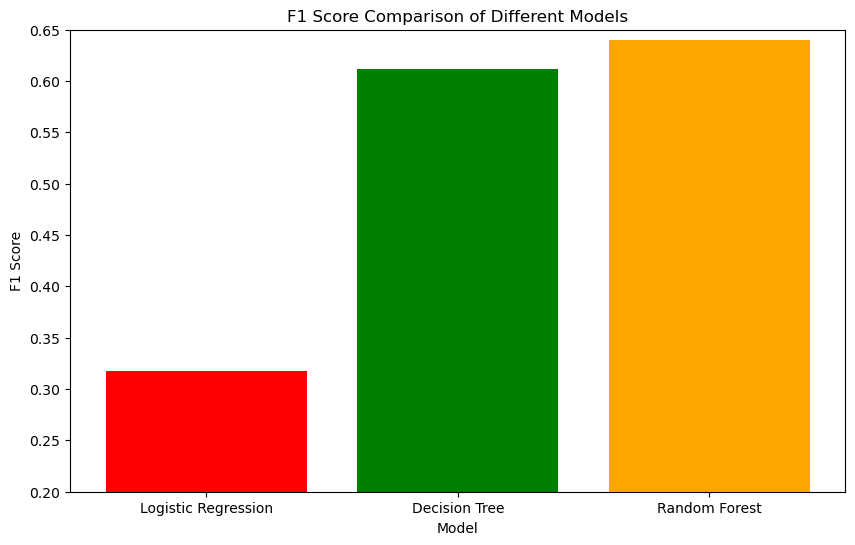

In [77]:
f1_scores = [0.318, 0.612, 0.64]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
#Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['red', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim([0.20, 0.65])  
plt.show()